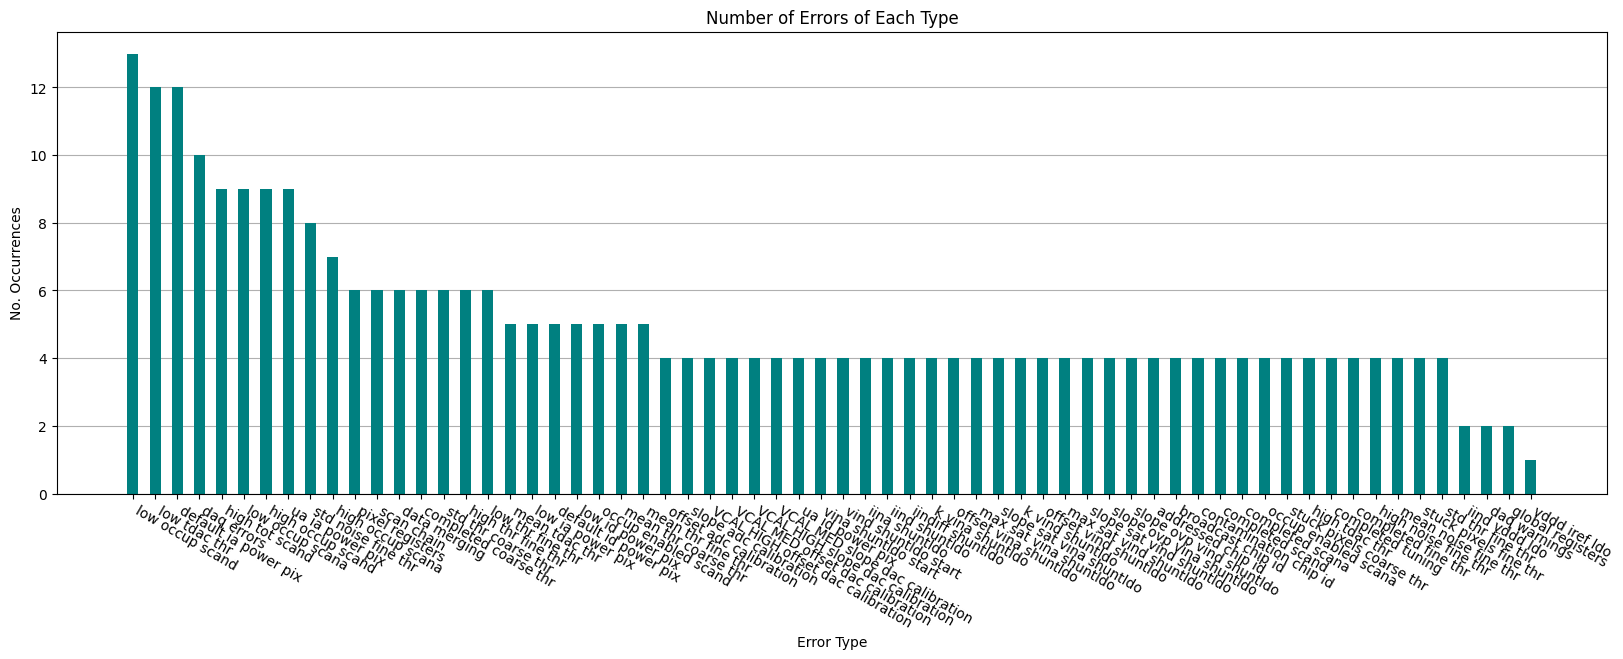

NameError: name 'f' is not defined

In [38]:
#gets counts of each failed test
#uses chip_statuses file
import re
import os
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
from collections import Counter

#open file
with open(os.path.expanduser('~/Desktop/wafer_NC0W14-05A4/20240607_150356/plots/_chip_statuses_NC0W14-05A4_20240607_150356.json'), 'r') as file:
    data = json.load(file)

errors = []
for colors,chips in data.items():
    for chip,error in chips.items():
        errors.extend(error)
        
fail = 0
for colors,chips in data.items():
    for chip,error in chips.items():
        fail += 1
#print(fail)   
        
counted_errors = Counter(errors)
    
# Plot
alph_data = dict(counted_errors.most_common())
labels = [s.replace("_"," ") for s in list(alph_data.keys())]
values = list(alph_data.values())

fig = plt.figure(figsize = (20, 6))

# creating the bar plot
plt.bar(labels, values, color ='teal', 
        width = 0.5, zorder=2)

plt.grid(axis = 'y', zorder = 1)
plt.xlabel("Error Type")
plt.ylabel("No. Occurrences")
plt.title("Number of Errors of Each Type")
plt.xticks(rotation=-30, ha='left')
plt.show()   

# Print the counts
f#or error, count in alph_data.items():
    #print(f"{error}: {count}")

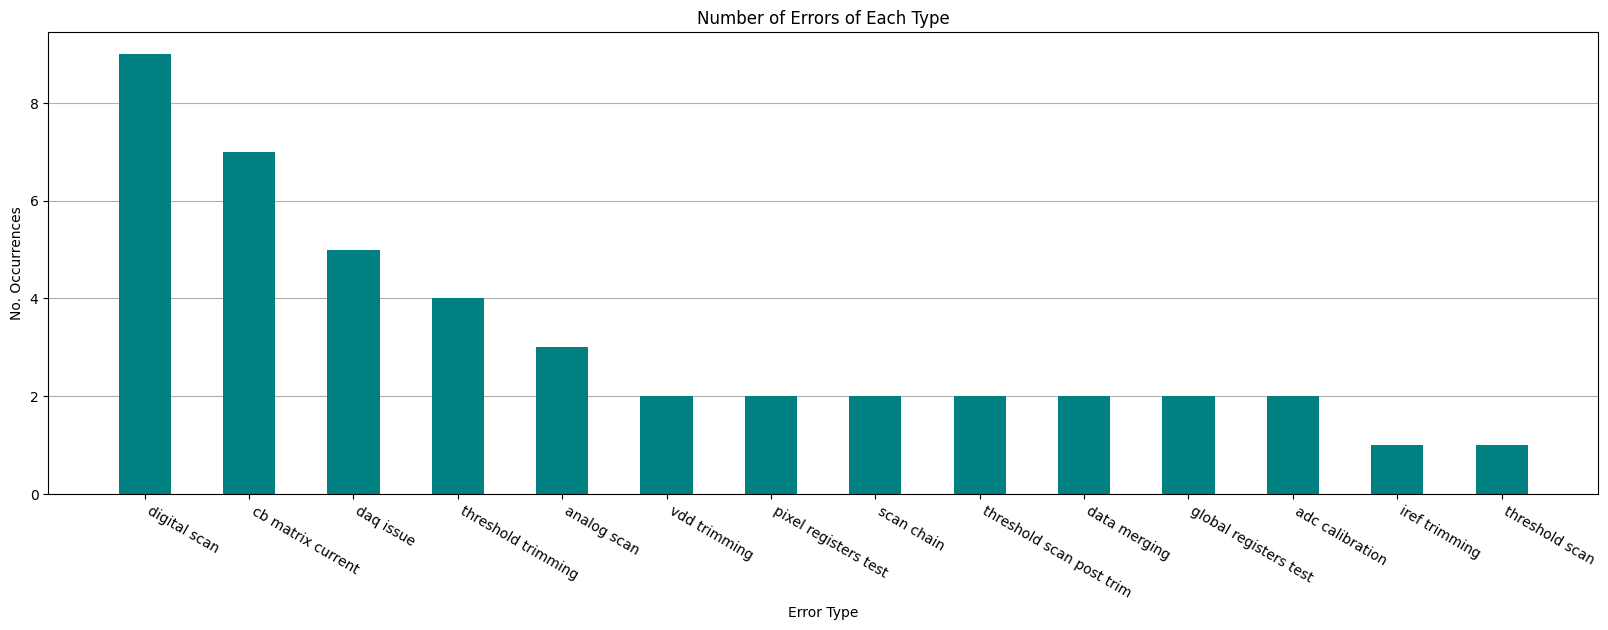

In [36]:
#gets all failure reasons
#using indiv. chip json files (db folder)
import re
import os
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
from collections import Counter

#open file
folder = '~/Desktop/wafer_NC0W14-05A4/20240607_150356/plots/db/'
pattern = r'chip_(.*).json'
errors = []
for i in os.listdir(os.path.expanduser(folder)):
    match = re.search(pattern, i)
    if match:
        filepath = str(folder + i)
        with open(os.path.expanduser(filepath), 'r') as file:
            data = json.load(file)
        for k,v in data.items():
                if k == "FAILURE_REASON" and v != None:
                    errors.append(v)

#count number of each error
counted_errors = Counter(errors)
    
# Plot
alph_data = dict(counted_errors.most_common())
labels = [s.replace("_"," ") for s in list(alph_data.keys())]
values = list(alph_data.values())
fig = plt.figure(figsize = (20, 6))

# creating the bar plot
plt.bar(labels, values, color ='teal', 
        width = 0.5, zorder=2)

plt.grid(axis = 'y', zorder = 1)
plt.xlabel("Error Type")
plt.ylabel("No. Occurrences")
plt.title("Number of Errors of Each Type")
plt.xticks(rotation=-30, ha='left')
plt.show()   

# Print the counts
#for error, count in alph_data.items():
    #print(f"{error}: {count}")

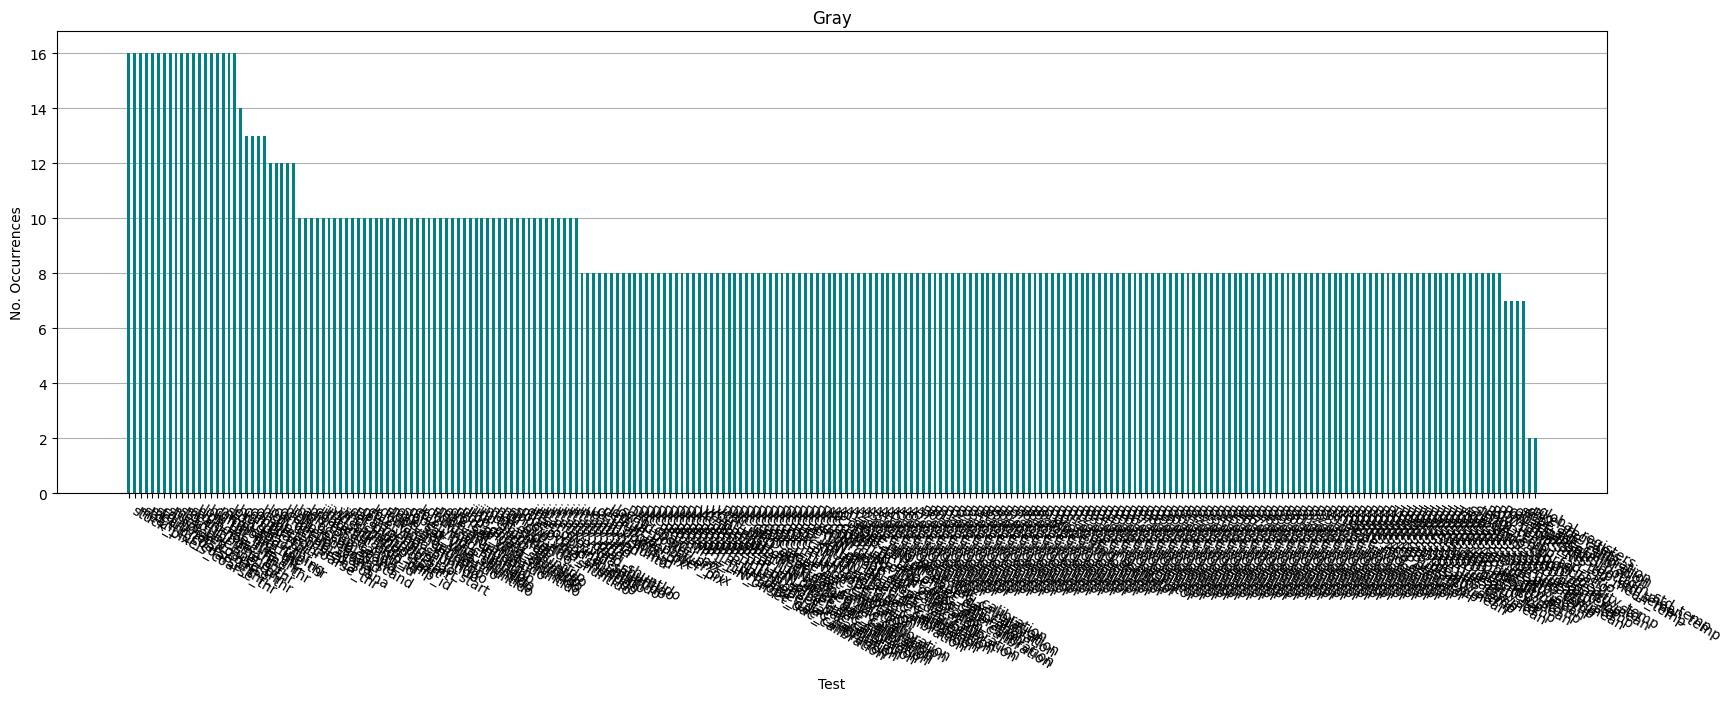

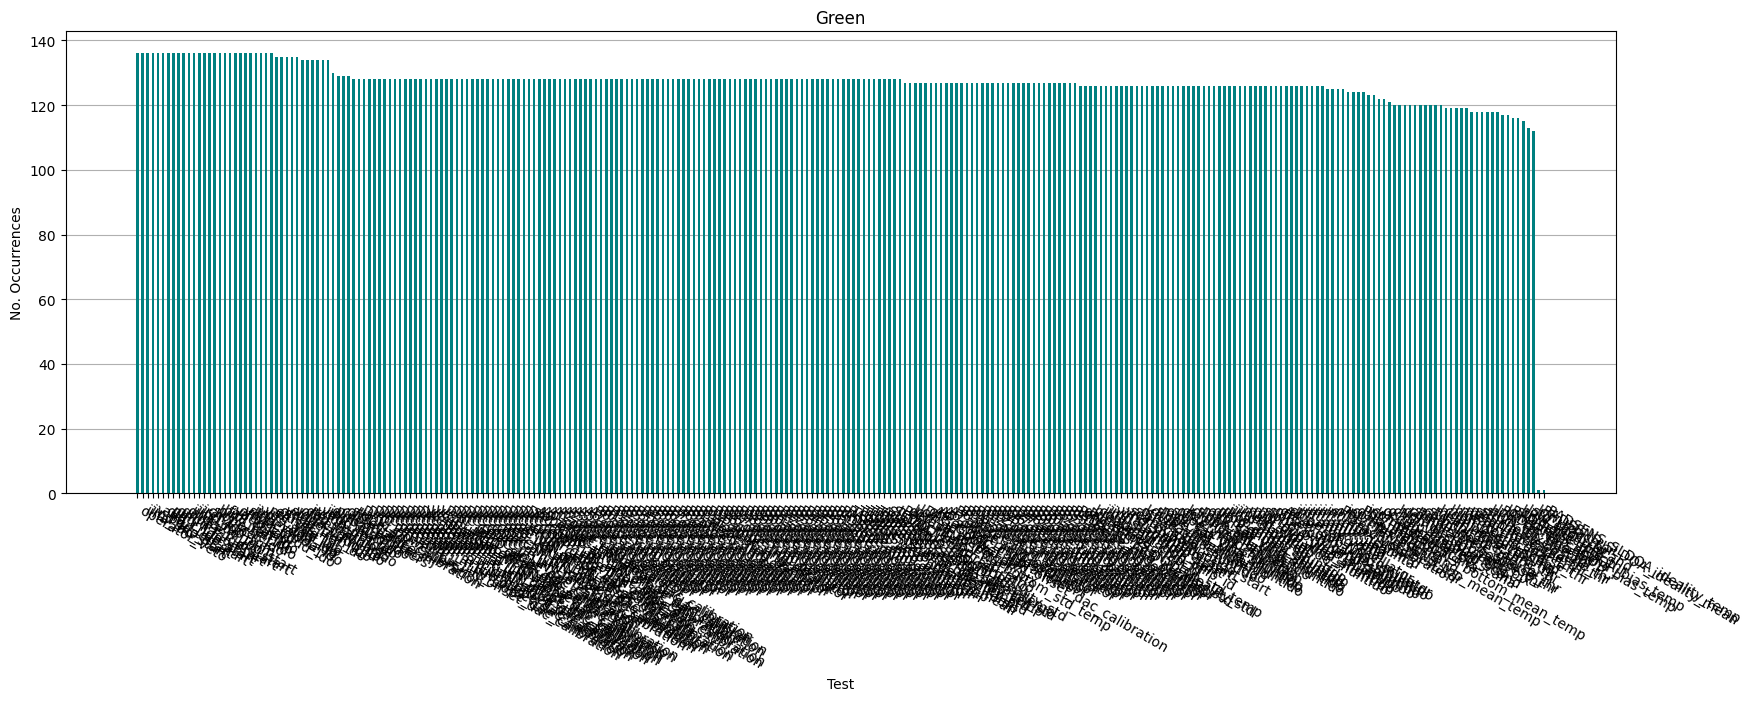

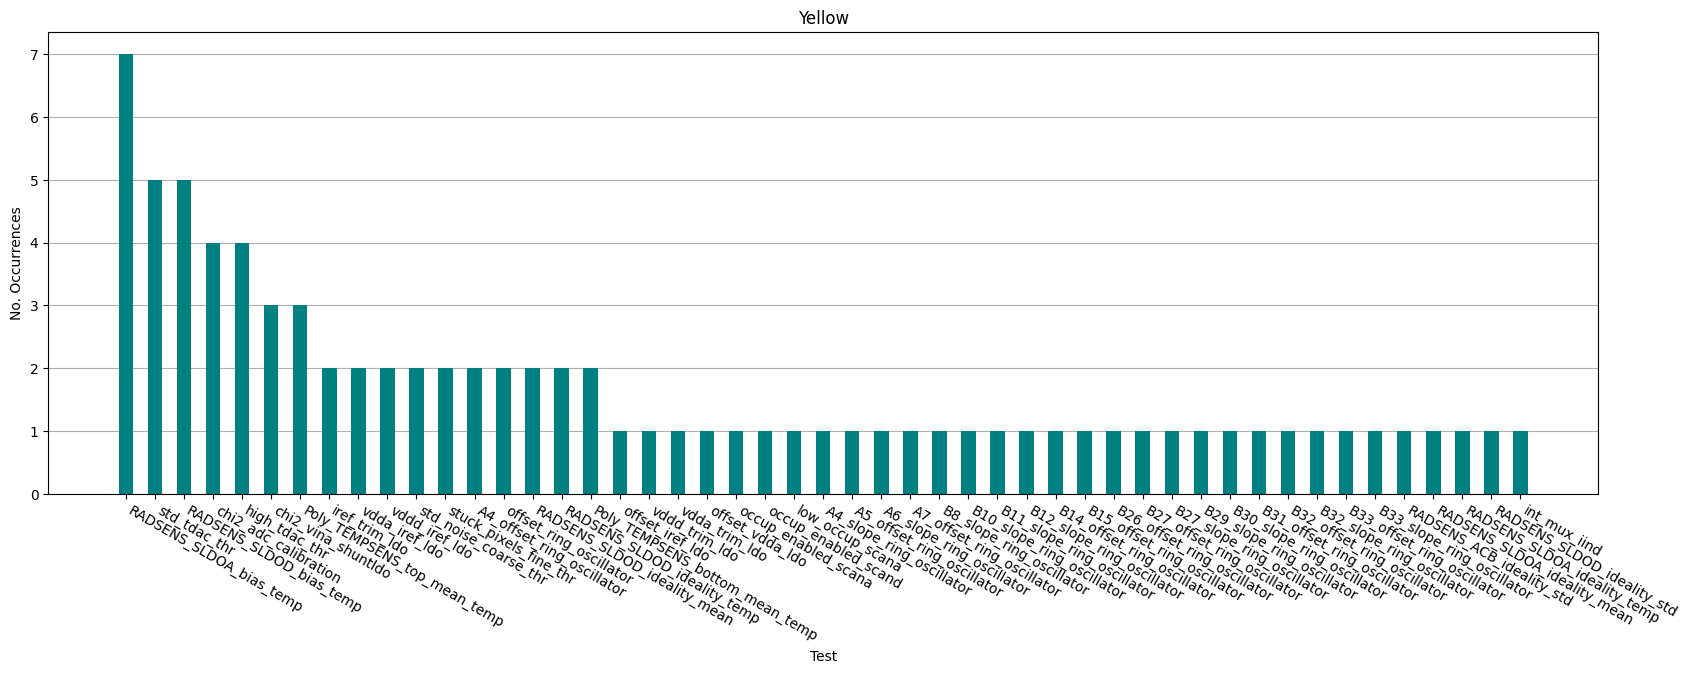

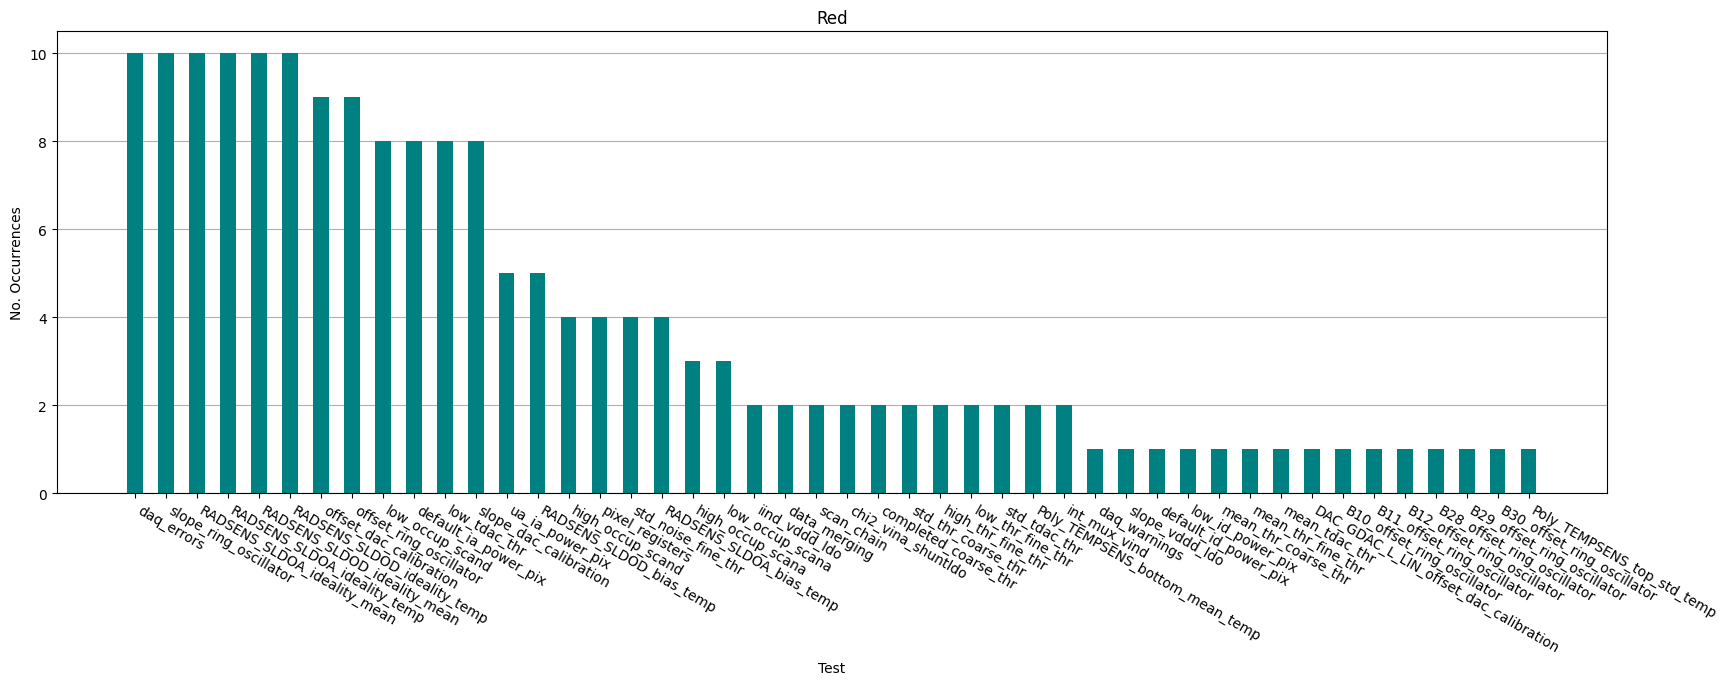

In [33]:
#plots all tests and the number of chips with them on red, green, yellow, and gray graphs
#using _wafer_data file
import re
import os
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
from collections import Counter

#open file
with open(os.path.expanduser('~/Desktop/wafer_NC0W14-05A4/20240607_150356/plots/_wafer_data_NC0W14-05A4_20240607_150356.json'), 'r') as file:
    data = json.load(file)

redtests = {}
yellowtests = {}
greentests = {}
graytests = {}
extra = {} #for chips/tests with status 3--what does that mean??
for k,v in data.items(): #loop through lines of json file to find statistics dictionary
    if k == "statistics": 
        for test, stats in v.items(): #loop through the statistics dictionary, which contains each test
            if isinstance(stats, dict):
                for a, b in stats.items(): #loop through the test's dictionary to get counts
                    if a == "counts":
                        for stat, count in b.items():
                            if stat == "-1":
                                graytests.update({test: count})
                            elif stat == "0":
                                greentests.update({test: count})
                            elif stat == "1":
                                yellowtests.update({test: count})
                            elif stat == "2":
                                redtests.update({test: count})
                            elif stat == "3":
                                extra.update({test: count})
                            else:
                                print(f'Stat does not exist: {stat} for test {test}')

#Data for each plot
keys_to_remove = []
for k, v in list(graytests.items()):  # Use list(my_dict.items()) to create a copy of the items to iterate over
    if v == 0:
        keys_to_remove.append(k)
        del graytests[k]    
alph_gray = dict(Counter(graytests).most_common())
gray_x = list(alph_gray.keys())
gray_y = list(alph_gray.values())

keys_to_remove = []
for k, v in list(greentests.items()):  # Use list(my_dict.items()) to create a copy of the items to iterate over
    if v == 0:
        keys_to_remove.append(k)
        del greentests[k]    
alph_green = dict(Counter(greentests).most_common())
green_x = list(alph_green.keys())
green_y = list(alph_green.values())

keys_to_remove = []
for k, v in list(yellowtests.items()):  # Use list(my_dict.items()) to create a copy of the items to iterate over
    if v == 0:
        keys_to_remove.append(k)
        del yellowtests[k]    
alph_yellow = dict(Counter(yellowtests).most_common())
yellow_x = list(alph_yellow.keys())
yellow_y = list(alph_yellow.values())

keys_to_remove = []
for k, v in list(redtests.items()):  # Use list(my_dict.items()) to create a copy of the items to iterate over
    if v == 0:
        keys_to_remove.append(k)
        del redtests[k]    
alph_red = dict(Counter(redtests).most_common())
red_x = list(alph_red.keys())
red_y = list(alph_red.values())

# creating the bar plots
fig = plt.figure(figsize = (20, 6))
plt.bar(gray_x, gray_y, color ='teal', 
        width = 0.5, zorder=2)
plt.grid(axis = 'y', zorder = 1)
plt.xlabel("Test")
plt.ylabel("No. Occurrences")
plt.title("Gray")
plt.xticks(rotation=-30, ha='left')
plt.show()   

fig = plt.figure(figsize = (20, 6))
plt.bar(green_x, green_y, color ='teal', 
        width = 0.5, zorder=2)
plt.grid(axis = 'y', zorder = 1)
plt.xlabel("Test")
plt.ylabel("No. Occurrences")
plt.title("Green")
plt.xticks(rotation=-30, ha='left')
plt.show()  

fig = plt.figure(figsize = (20, 6))
plt.bar(yellow_x, yellow_y, color ='teal', 
        width = 0.5, zorder=2)
plt.grid(axis = 'y', zorder = 1)
plt.xlabel("Test")
plt.ylabel("No. Occurrences")
plt.title("Yellow")
plt.xticks(rotation=-30, ha='left')
plt.show()  

fig = plt.figure(figsize = (20, 6))
plt.bar(red_x, red_y, color ='teal', 
        width = 0.5, zorder=2)
plt.grid(axis = 'y', zorder = 1)
plt.xlabel("Test")
plt.ylabel("No. Occurrences")
plt.title("Red")
plt.xticks(rotation=-30, ha='left')
plt.show()  